In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as ts
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

In [38]:
df = pdr.get_data_yahoo("AAPL")

model = keras.models.load_model("../OASiS_Genesis.keras")

model.summary()

[*********************100%%**********************]  1 of 1 completed
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_19 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
data = df.filter(['Close'])
dataset = data.values

scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

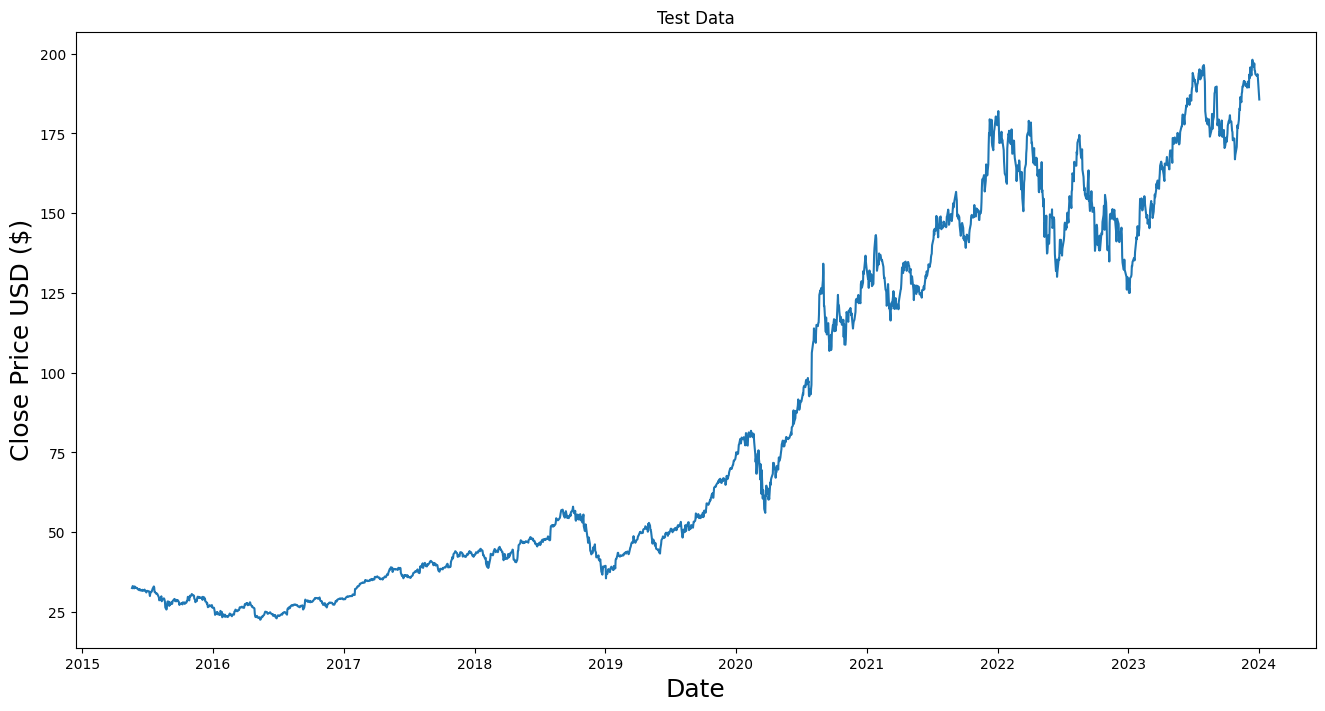

In [11]:
test_data_length = int(np.ceil(len(dataset)*.8))

plt.figure(figsize=(16,8))
plt.title('Test Data')
plt.plot(data.iloc[test_data_length:])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [64]:
real_test_data = scaled_data[test_data_length-60:, :]

unknown_test_repetitions = len(scaled_data[test_data_length:,0])
print(unknown_test_repetitions)

x_test = []

x_test.append(real_test_data[0:60, 0])
# At this point I have 1 pages, each with 60 rows, each row has 1 column

x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

list_predictions = []

for _ in range(unknown_test_repetitions):
    prediction = model.predict(x_test)
    list_predictions.append(prediction)
    
    print(f"Prediction Generated for timestep addition {_} is {prediction}")

    updated_sequence = x_test[:,1:,:]
    prediction = prediction.reshape(1,1,1)
    updated_sequence = np.concatenate((updated_sequence, prediction), axis=1)
    x_test = updated_sequence

2170
1/1 [==============================] - 0s 257ms/step
Prediction Generated for timestep addition 0 is [[0.15861034]]
1/1 [==============================] - 0s 35ms/step
Prediction Generated for timestep addition 1 is [[0.15902863]]
1/1 [==============================] - 0s 27ms/step
Prediction Generated for timestep addition 2 is [[0.15925506]]
1/1 [==============================] - 0s 32ms/step
Prediction Generated for timestep addition 3 is [[0.15929393]]
1/1 [==============================] - 0s 29ms/step
Prediction Generated for timestep addition 4 is [[0.15918586]]
1/1 [==============================] - 0s 25ms/step
Prediction Generated for timestep addition 5 is [[0.15897755]]
1/1 [==============================] - 0s 25ms/step
Prediction Generated for timestep addition 6 is [[0.15870853]]
1/1 [==============================] - 0s 34ms/step
Prediction Generated for timestep addition 7 is [[0.15840733]]
1/1 [==============================] - 0s 27ms/step
Prediction Generated f

In [66]:
list_predictions = np.array(list_predictions)
list_predictions.shape

list_predictions = np.reshape(list_predictions, newshape=(list_predictions.shape[0],1))
list_predictions = scalar.inverse_transform(list_predictions)

print(f"List of predictions for feed forward model is: {list_predictions}")

List of predictions for feed forward model is: [[31.463614  ]
 [31.546461  ]
 [31.591307  ]
 ...
 [-0.73081267]
 [-0.73086524]
 [-0.7309173 ]]


In [87]:

FF_data = data.iloc[test_data_length:]
# Add the predictions to the dataframe
FF_data['Predictions'] = list_predictions[:,:]
FF_data

C:\Users\Brandon\AppData\Local\Temp\ipykernel_21980\1311719696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF_data['Predictions'] = list_predictions[:,:]


,Close,Predictions
Date,,
2015-05-20,32.514999,31.463614
2015-05-21,32.847500,31.546461
2015-05-22,33.134998,31.591307
2015-05-26,32.404999,31.599007
2015-05-27,33.009998,31.577600
...,...,...
2023-12-26,193.050003,-0.730706
2023-12-27,193.149994,-0.730760
2023-12-28,193.580002,-0.730813


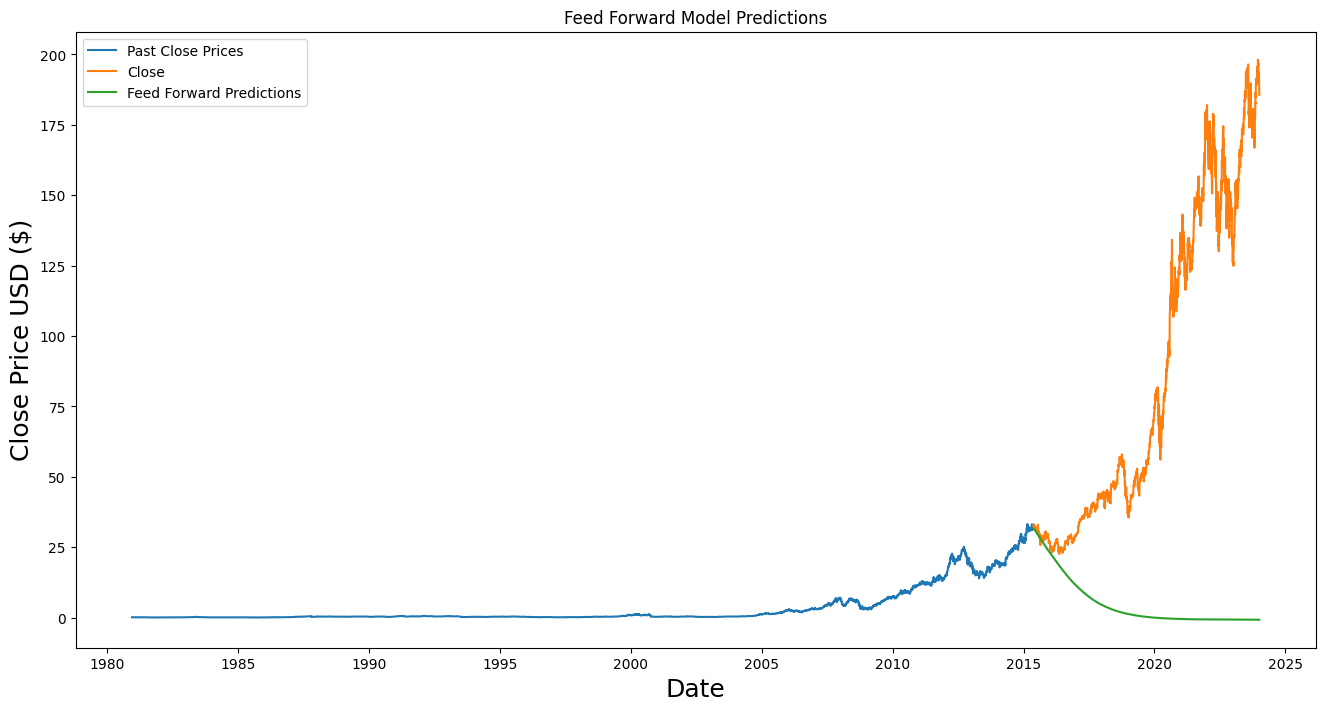

In [94]:

plt.figure(figsize=(16,8))
plt.title('Feed Forward Model Predictions')
plt.plot(data.iloc[:test_data_length])
plt.plot(FF_data[['Close', 'Predictions']])
plt.legend(['Past Close Prices','Close', 'Feed Forward Predictions'], loc='upper left')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [115]:
real_test_data = scaled_data[test_data_length-60:, :]

unknown_test_repetitions = len(scaled_data[test_data_length:,0])
print(unknown_test_repetitions)

x_test = []

x_test.append(real_test_data[0:60, 0])
# At this point I have 1 pages, each with 60 rows, each row has 1 column

x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

list_predictions = []
real_test_data = real_test_data.reshape(real_test_data.shape[0],1,1)
for _ in range(unknown_test_repetitions):
    prediction = model.predict(x_test)
    list_predictions.append(prediction)
    
    print(f"Prediction Generated for timestep addition {_} is {prediction}")

    updated_sequence = x_test[:,1:,:]
    prediction = prediction.reshape(1,1,1)
    updated_sequence = np.concatenate((updated_sequence, real_test_data[61+_,0].reshape(1,1,1)), axis=1)
    x_test = updated_sequence


2170
1/1 [==============================] - 0s 38ms/step
Prediction Generated for timestep addition 0 is [[0.15861034]]
1/1 [==============================] - 0s 43ms/step
Prediction Generated for timestep addition 1 is [[0.15929939]]
1/1 [==============================] - 0s 37ms/step
Prediction Generated for timestep addition 2 is [[0.16013926]]
1/1 [==============================] - 0s 37ms/step
Prediction Generated for timestep addition 3 is [[0.16091593]]
1/1 [==============================] - 0s 40ms/step
Prediction Generated for timestep addition 4 is [[0.16165105]]
1/1 [==============================] - 0s 26ms/step
Prediction Generated for timestep addition 5 is [[0.16231567]]
1/1 [==============================] - 0s 38ms/step
Prediction Generated for timestep addition 6 is [[0.16281419]]
1/1 [==============================] - 0s 39ms/step
Prediction Generated for timestep addition 7 is [[0.16313887]]
1/1 [==============================] - 0s 32ms/step
Prediction Generated fo

IndexError: index 2230 is out of bounds for axis 0 with size 2230

In [122]:
list_predictions = np.array(list_predictions)
list_predictions.shape

list_predictions = np.reshape(list_predictions, newshape=(list_predictions.shape[0],1))
list_predictions = scalar.inverse_transform(list_predictions)

print(f"List of predictions for Self Correcting feed forward model is: {list_predictions}")
FF_data['Self-Correcting FF Prediction'] = list_predictions

FF_data

List of predictions for Self Correcting feed forward model is: [[ 31.463614]
 [ 31.600086]
 [ 31.766434]
 ...
 [189.09467 ]
 [188.60513 ]
 [187.7724  ]]


C:\Users\Brandon\AppData\Local\Temp\ipykernel_21980\1075957934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF_data['Self-Correcting FF Prediction'] = list_predictions


,Close,Predictions,Self-Correcting FF Prediction
Date,,,
2015-05-20,32.514999,31.463614,31.463614
2015-05-21,32.847500,31.546461,31.600086
2015-05-22,33.134998,31.591307,31.766434
2015-05-26,32.404999,31.599007,31.920259
2015-05-27,33.009998,31.577600,32.065857
...,...,...,...
2023-12-26,193.050003,-0.730706,190.108078
2023-12-27,193.149994,-0.730760,189.593552
2023-12-28,193.580002,-0.730813,189.094666


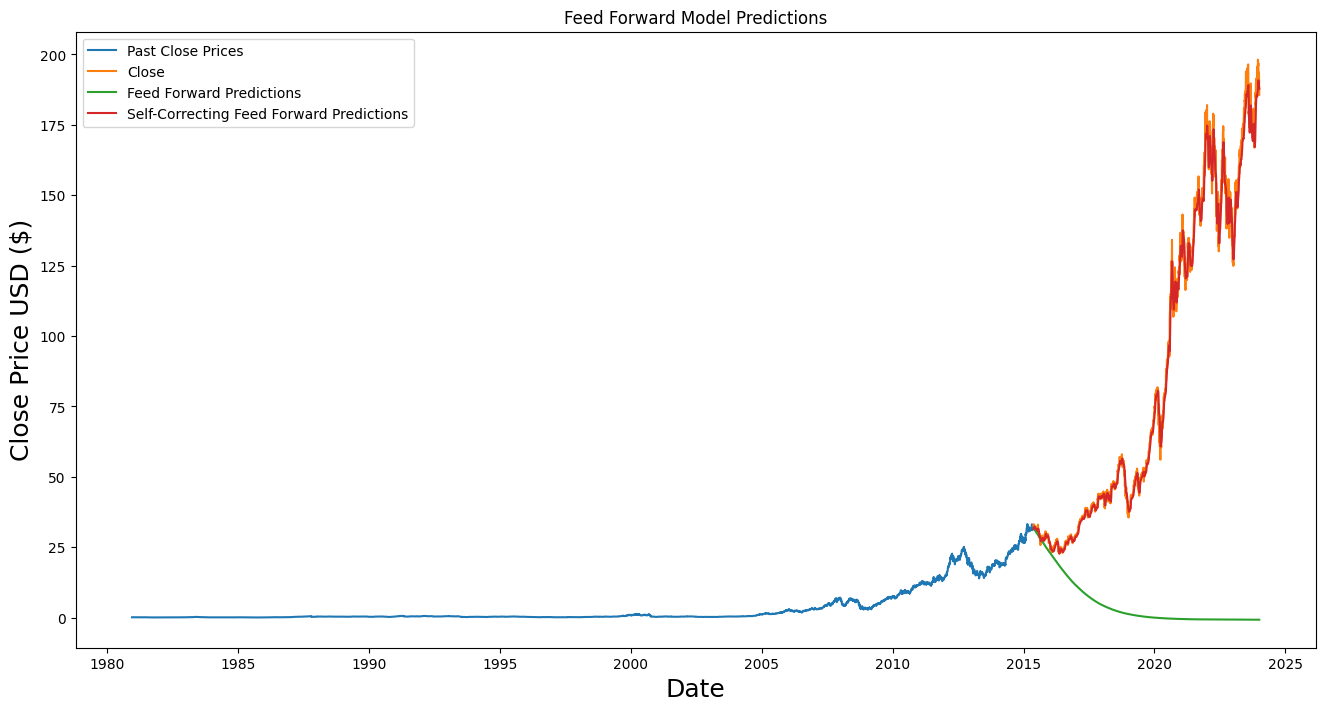

In [123]:
plt.figure(figsize=(16,8))
plt.title('Feed Forward Model Predictions')
plt.plot(data.iloc[:test_data_length])
plt.plot(FF_data[['Close', 'Predictions', 'Corrected FF Prediction']])
plt.legend(['Past Close Prices','Close', 'Feed Forward Predictions', 'Corrected Feed Forward Predictions'], loc='upper left')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()